## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  47.622476   431.276272  0.848963   1.785067   369.280002
1   5.682877  1545.798746  0.738403   1.319010  1141.287355
2  99.213830   705.755017  0.489484   5.327810   359.413322
3  13.227939   254.939006  0.528282   4.063431   135.238570
4  41.587612   499.342345  0.949505  10.468910   476.045173


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9796683	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.9659127	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9549786	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9405546	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9246917	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9116054	total: 71.8ms	remaining: 11.9s
6:	learn: 0.8988620	total: 72.2ms	remaining: 10.2s
7:	learn: 0.8876526	total: 72.9ms	remaining: 9.04s
8:	learn: 0.8763500	total: 73.5ms	remaining: 8.1s
9:	learn: 0.8643325	total: 74.2ms	remaining: 7.35s
10:	learn: 0.8518458	total: 74.7ms	remaining: 6.71s
11:	learn: 0.8379844	total: 75.2ms	remaining: 6.19s
12:	learn: 0.8246418	total: 75.8ms	remaining: 5.75s
13:	learn: 0.8123867	total: 76.3ms	remaining: 5.38s
14:	learn: 0.8011486	total: 76.8ms	remaining: 5.04s
15:	learn: 0.7925847	total: 77.3ms	remaining: 4.76s
16:	learn: 0.7802412	total: 77.9ms	remaining: 4.5s
17:	learn: 0.7714256	total: 78.4ms	remaining: 4.28s
18:	learn: 0.7637321	total: 78.8ms	remaining: 

83:	learn: 0.3422563	total: 109ms	remaining: 1.18s
84:	learn: 0.3376033	total: 109ms	remaining: 1.17s
85:	learn: 0.3337582	total: 110ms	remaining: 1.17s
86:	learn: 0.3303613	total: 110ms	remaining: 1.16s
87:	learn: 0.3265385	total: 111ms	remaining: 1.15s
88:	learn: 0.3222716	total: 111ms	remaining: 1.14s
89:	learn: 0.3190031	total: 112ms	remaining: 1.13s
90:	learn: 0.3146629	total: 112ms	remaining: 1.12s
91:	learn: 0.3111714	total: 112ms	remaining: 1.11s
92:	learn: 0.3079539	total: 113ms	remaining: 1.1s
93:	learn: 0.3049378	total: 113ms	remaining: 1.09s
94:	learn: 0.3014867	total: 114ms	remaining: 1.08s
95:	learn: 0.2987621	total: 114ms	remaining: 1.08s
96:	learn: 0.2952502	total: 115ms	remaining: 1.07s
97:	learn: 0.2918908	total: 115ms	remaining: 1.06s
98:	learn: 0.2884704	total: 116ms	remaining: 1.05s
99:	learn: 0.2857627	total: 116ms	remaining: 1.05s
100:	learn: 0.2830375	total: 117ms	remaining: 1.04s
101:	learn: 0.2802404	total: 117ms	remaining: 1.03s
102:	learn: 0.2772703	total: 1

252:	learn: 0.0766074	total: 187ms	remaining: 552ms
253:	learn: 0.0760846	total: 187ms	remaining: 550ms
254:	learn: 0.0755148	total: 188ms	remaining: 549ms
255:	learn: 0.0749656	total: 188ms	remaining: 547ms
256:	learn: 0.0744460	total: 189ms	remaining: 545ms
257:	learn: 0.0740502	total: 189ms	remaining: 544ms
258:	learn: 0.0736097	total: 190ms	remaining: 542ms
259:	learn: 0.0732342	total: 190ms	remaining: 541ms
260:	learn: 0.0727336	total: 191ms	remaining: 539ms
261:	learn: 0.0722276	total: 191ms	remaining: 538ms
262:	learn: 0.0716537	total: 191ms	remaining: 536ms
263:	learn: 0.0711871	total: 192ms	remaining: 535ms
264:	learn: 0.0707571	total: 192ms	remaining: 533ms
265:	learn: 0.0704189	total: 193ms	remaining: 532ms
266:	learn: 0.0699389	total: 193ms	remaining: 530ms
267:	learn: 0.0695361	total: 194ms	remaining: 529ms
268:	learn: 0.0690563	total: 194ms	remaining: 528ms
269:	learn: 0.0685888	total: 195ms	remaining: 526ms
270:	learn: 0.0681404	total: 195ms	remaining: 524ms
271:	learn: 

478:	learn: 0.0285086	total: 291ms	remaining: 316ms
479:	learn: 0.0284028	total: 292ms	remaining: 316ms
480:	learn: 0.0282564	total: 292ms	remaining: 315ms
481:	learn: 0.0282021	total: 292ms	remaining: 314ms
482:	learn: 0.0281439	total: 293ms	remaining: 313ms
483:	learn: 0.0279895	total: 293ms	remaining: 313ms
484:	learn: 0.0279526	total: 294ms	remaining: 312ms
485:	learn: 0.0278108	total: 294ms	remaining: 311ms
486:	learn: 0.0277547	total: 295ms	remaining: 310ms
487:	learn: 0.0277176	total: 295ms	remaining: 310ms
488:	learn: 0.0275900	total: 296ms	remaining: 309ms
489:	learn: 0.0274313	total: 296ms	remaining: 308ms
490:	learn: 0.0273793	total: 297ms	remaining: 308ms
491:	learn: 0.0273282	total: 297ms	remaining: 307ms
492:	learn: 0.0272750	total: 298ms	remaining: 306ms
493:	learn: 0.0271502	total: 298ms	remaining: 305ms
494:	learn: 0.0271004	total: 299ms	remaining: 305ms
495:	learn: 0.0269776	total: 299ms	remaining: 304ms
496:	learn: 0.0269283	total: 299ms	remaining: 303ms
497:	learn: 

647:	learn: 0.0165947	total: 369ms	remaining: 200ms
648:	learn: 0.0165039	total: 370ms	remaining: 200ms
649:	learn: 0.0164416	total: 370ms	remaining: 199ms
650:	learn: 0.0163605	total: 371ms	remaining: 199ms
651:	learn: 0.0163252	total: 371ms	remaining: 198ms
652:	learn: 0.0162644	total: 371ms	remaining: 197ms
653:	learn: 0.0161851	total: 372ms	remaining: 197ms
654:	learn: 0.0161644	total: 372ms	remaining: 196ms
655:	learn: 0.0160947	total: 373ms	remaining: 196ms
656:	learn: 0.0160775	total: 373ms	remaining: 195ms
657:	learn: 0.0160558	total: 373ms	remaining: 194ms
658:	learn: 0.0160363	total: 374ms	remaining: 193ms
659:	learn: 0.0159995	total: 374ms	remaining: 193ms
660:	learn: 0.0159318	total: 375ms	remaining: 192ms
661:	learn: 0.0159149	total: 375ms	remaining: 192ms
662:	learn: 0.0158912	total: 376ms	remaining: 191ms
663:	learn: 0.0158323	total: 376ms	remaining: 190ms
664:	learn: 0.0157963	total: 377ms	remaining: 190ms
665:	learn: 0.0157120	total: 377ms	remaining: 189ms
666:	learn: 

869:	learn: 0.0070999	total: 473ms	remaining: 70.7ms
870:	learn: 0.0070727	total: 474ms	remaining: 70.2ms
871:	learn: 0.0070574	total: 474ms	remaining: 69.6ms
872:	learn: 0.0070423	total: 475ms	remaining: 69ms
873:	learn: 0.0070143	total: 475ms	remaining: 68.5ms
874:	learn: 0.0069815	total: 475ms	remaining: 67.9ms
875:	learn: 0.0069667	total: 476ms	remaining: 67.4ms
876:	learn: 0.0069414	total: 476ms	remaining: 66.8ms
877:	learn: 0.0069258	total: 477ms	remaining: 66.3ms
878:	learn: 0.0069011	total: 477ms	remaining: 65.7ms
879:	learn: 0.0068740	total: 478ms	remaining: 65.1ms
880:	learn: 0.0068597	total: 478ms	remaining: 64.6ms
881:	learn: 0.0068331	total: 479ms	remaining: 64ms
882:	learn: 0.0068092	total: 479ms	remaining: 63.5ms
883:	learn: 0.0067754	total: 480ms	remaining: 62.9ms
884:	learn: 0.0067440	total: 480ms	remaining: 62.4ms
885:	learn: 0.0067208	total: 480ms	remaining: 61.8ms
886:	learn: 0.0067059	total: 481ms	remaining: 61.2ms
887:	learn: 0.0066832	total: 481ms	remaining: 60.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

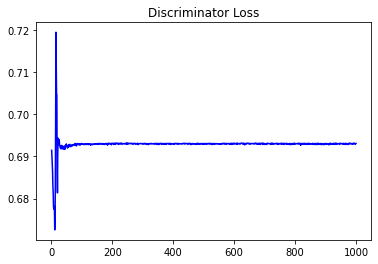

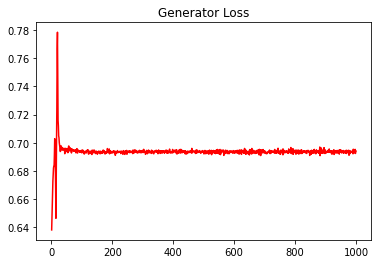

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.008472877157307912


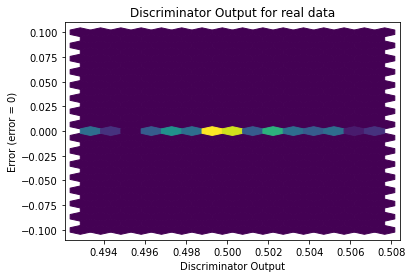

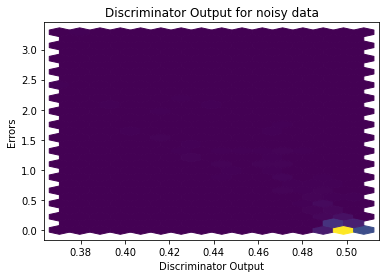

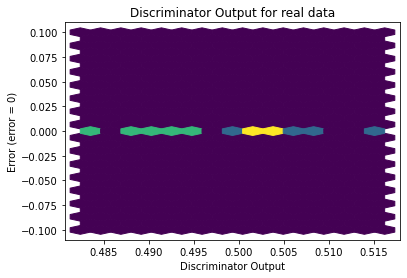

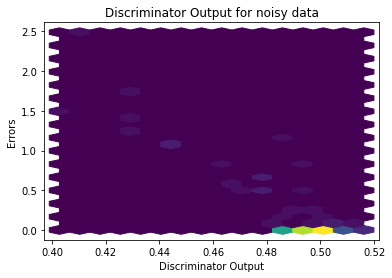

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


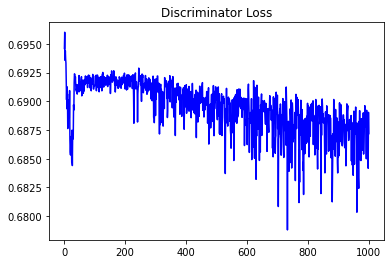

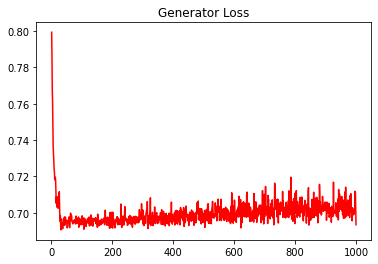

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.004788262306935063


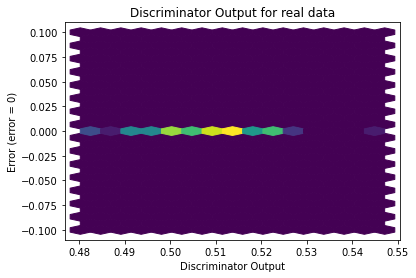

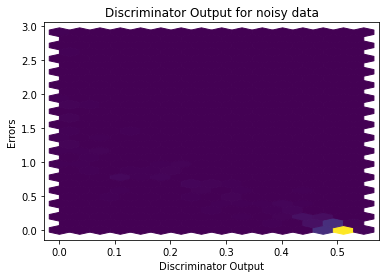

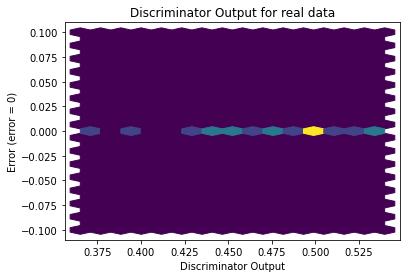

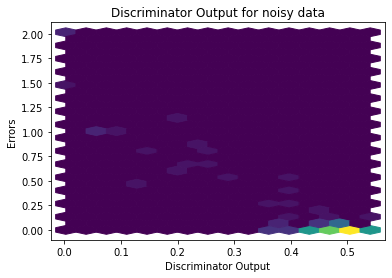

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1326]], requires_grad=True)
